# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем библиотеки. Читаем файл data.csv из папки /datasets и сохраняем его в переменной df.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/data.csv')

Посмотрим на первые 10 строк.

In [3]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Взглянем на общую информацию

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


У нас в таблице 12 столбцов<br>

Согласно документации к данным:
* children — количество детей в семье
*days_employed — общий трудовой стаж в днях
*dob_years — возраст клиента в годах
*education — уровень образования клиента
*education_id — идентификатор уровня образования
*family_status — семейное положение
*family_status_id — идентификатор семейного положения
*gender — пол клиента
*income_type — тип занятости
*debt — имел ли задолженность по возврату кредитов
*total_income — ежемесячный доход
*purpose — цель получения кредита

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод**

В каждой строке таблицы - статистика о платёжеспособности клиента. Все данные состоят из информации о клиенте кредитного банка: количество детей, трудовой стаж, возраст, образование, семейное положение, пол клиента, ежемесячный доход, цель получения кредита а так же имел ли задолженность по возврату кредитов.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных. Так же заметны неправильные данные в столбце days_employed — общий трудовой стаж в днях.

Чтоб исследование удалось надо устранить проблемы в данных.


## Шаг 2. Предобработка данных

### Исправление значений days_employed	

Взглянем на столбец days_employed

Text(0, 0.5, 'Количество людей')

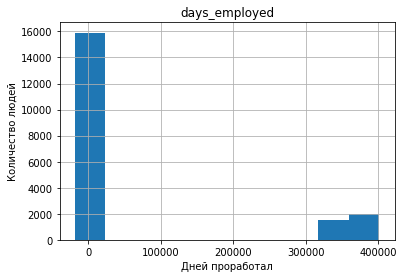

In [5]:
df['days_employed'].hist()
plt.title("days_employed")
plt.xlabel("Дней проработал")
plt.ylabel("Количество людей")

Данные разделились на 2 группы расмотрим первую(которая левее)

Text(0, 0.5, 'Количество людей')

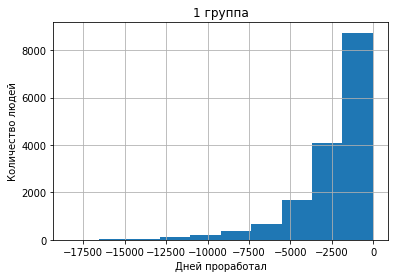

In [6]:
df[df['days_employed']<100000]['days_employed'].hist()
plt.title("1 группа")
plt.xlabel("Дней проработал")
plt.ylabel("Количество людей")

Они получились отрицательные. Такого не может быть. Взгянем на вторую группу

Text(0, 0.5, 'Количество людей')

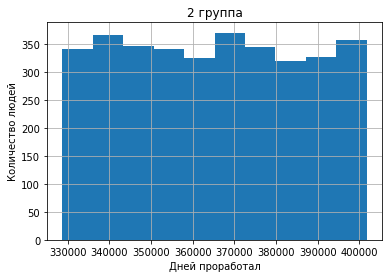

In [7]:
df[df['days_employed']>100000]['days_employed'].hist()
plt.title("2 группа")
plt.xlabel("Дней проработал")
plt.ylabel("Количество людей")

Все данные(дни) больше 300000 это больше 800 лет тоже неверно. Взглянем какие данные во 2 группе

In [8]:
df[df['days_employed']>100000]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21508,0,386497.714078,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161.054124,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем


Обратим внимание на income_type большая часть это пенсионеры 

Посмотрим сколько людей во второй группе, но не пенсионеры

In [9]:
df[(df['days_employed']>100000)&(df['income_type'] != 'пенсионер')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи
14798,0,395302.838654,45,Высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью


А теперь посчитаем сколько человек в 1 группе пенсионеры.

In [10]:
df[(df['days_employed']<100000)&(df['income_type'] == 'пенсионер')]['income_type'].count()

0

Ни одного.

Так же можно заметить что 1 группа меньше 0 а 2 группа больше 300000. Предположу что 1 группу перепутали местами начало и конец даты работы и появились отрицательные числа. А 2 группа значения приведены не в днях а  в часах. Давайте заменим значения в  группах.

In [11]:
df.loc[df['days_employed']>222222,'days_employed'] /= 24

In [12]:
df.loc[df['days_employed']<0,'days_employed'] *= -1

Взглянем на данные days_employed

Text(0, 0.5, 'Количество людей')

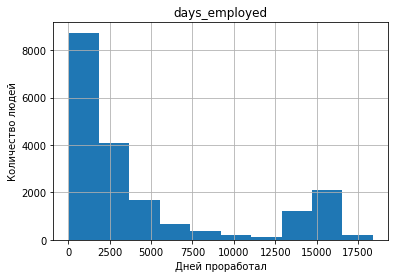

In [13]:
df['days_employed'].hist()
plt.title("days_employed")
plt.xlabel("Дней проработал")
plt.ylabel("Количество людей")

Убедимся в их правильности посмотрим на максимальное и минимальное значение

In [14]:
df['days_employed'].max()

18388.949900568383

In [15]:
df['days_employed'].min()

24.14163324048118

Все в порядке.

**Вывод**

В столбце days_employed были явные неправильные данные разделившиеся на 2 группы. 

Первая группа была людей не пенсионеров с отрицательными значениями, заменили значения положительными. 

Вторая группа пенсионеры у которых были завышенные значения, предположительно в часах вместо днях, поделили значения на 24.

### Обработка пропусков

Сначала посчитаем, сколько в таблице пропущенных значений.

In [16]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Все пропущенные значения в двух столбцах( days_employed - 2174 пропуска и total_income - 2174 пропуска). Скорее всего пропуски у одинаковых клиентов. 

Посчитаем сколько клиентов с пропусками.

In [17]:
df[df.isna().any(axis=1)]['children'].count()

2174

Число клиентов с пропусками совпадает с числом пропусков в days_employed и total_income. А значит на одну ошибку в days_employed приходиться ошибка в total_income. Взглянем на них.

In [18]:
df[df.isna().any(axis=1)].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


В толбцах days_employedи income_type заменим медианной сгруппированой по income_type.К примеру для человека пенсионера найдем медиану для всех кто пенсионер и заполним этим значением.

In [19]:
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))

In [20]:
df['days_employed'] = df['days_employed'].fillna(df.groupby('income_type')['days_employed'].transform('median'))

Проверим остались ли пропуски

Убедимся, что в таблице не осталось пропусков.

In [21]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

В строках где нет данных days_employed так же нет total_income. Возможно эти данные пришли из отделения, где не указываются days_employed и total_income, являются копиями других стрк без заполненых данных или они были повреждены. Так же мы заполнили пропуски столбцов медианной сгруппированой по dob_years.

### Замена типа данных

Перейдем к замене типа данных для начала посмотрим на тип данных

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В столбце days_employed и total_income сейчас вещественные числа. В этих столбцах указаны количественные параметры и чтоб не работать с 0,001 днем лучше всего превратить их в целые числа.     

In [23]:
df['days_employed'] = df['days_employed'].astype('int')

In [24]:
df['total_income'] = df['total_income'].astype('int')

Проверим заменились ли типы данных.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

В столбцах days_employed и total_income были вещественные числа,но days_employed и total_income количественные параметры .Чтобы не работать с 0,001 днем  мы превратили их в целочисленые.

<div class="alert alert-success">
<b>✅ Комментарий ревьюера:</b> 

Работа над типами корректна
</div>

### Обработка дубликатов

Перед обработкой дубликатов надо посмотреть все ли впорядке во всех столбцах.

Начнем с children. Посмотрим сколько уникальных значений

In [26]:
sorted(df['children'].unique())

[-1, 0, 1, 2, 3, 4, 5, 20]

У нас есть отрицательное колличество детей. Такого не может быть, так что заменим на положительное

In [27]:
df.loc[df['children']<0,'children'] *= -1

Еще у нас есть количество детей 20 скорее всего случайно добавили 0

In [28]:
df.loc[df['children']== 20,['children']] = 2 

In [29]:
sorted(df['children'].unique())

[0, 1, 2, 3, 4, 5]

Столбец children впорялке теперь очередь education

In [30]:
sorted(df['education'].unique())

['ВЫСШЕЕ',
 'Высшее',
 'НАЧАЛЬНОЕ',
 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
 'Начальное',
 'Неоконченное высшее',
 'СРЕДНЕЕ',
 'Среднее',
 'УЧЕНАЯ СТЕПЕНЬ',
 'Ученая степень',
 'высшее',
 'начальное',
 'неоконченное высшее',
 'среднее',
 'ученая степень']

Встерчаются одинаковые слова но отличаются в их написании привидем все к одному виду.

In [31]:
df['education'] = df['education'].str.lower()

In [32]:
sorted(df['education'].unique())

['высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']

В столбце education приведины к одному виду. Перейдем к следующему столбцу family_status

In [33]:
sorted(df['family_status'].unique())

['Не женат / не замужем',
 'в разводе',
 'вдовец / вдова',
 'гражданский брак',
 'женат / замужем']

С ним все хорошо. Следующий столбец gender

In [34]:
sorted(df['gender'].unique())

['F', 'M', 'XNA']

Кроме M - мужчина и F - женщина так же встечается XNA посмотрим на них

In [35]:
df[df['gender']=='XNA'].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


Посмотрим на количество F, M, XNA.

In [36]:
df.groupby('gender')['children'].count()

gender
F      14236
M       7288
XNA        1
Name: children, dtype: int64

Заменим XNA на чаще встречающийся пол в данном случае F

In [37]:
df.loc[df['gender']=='XNA','gender'] = 'F'

In [38]:
df.groupby('gender')['children'].count()

gender
F    14237
M     7288
Name: children, dtype: int64

Следующий income_type

In [39]:
sorted(df['income_type'].unique())

['безработный',
 'в декрете',
 'госслужащий',
 'компаньон',
 'пенсионер',
 'предприниматель',
 'сотрудник',
 'студент']

Дальше purpose

In [40]:
sorted(df['purpose'].unique())

['автомобили',
 'автомобиль',
 'высшее образование',
 'дополнительное образование',
 'жилье',
 'заняться высшим образованием',
 'заняться образованием',
 'на покупку автомобиля',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'на проведение свадьбы',
 'недвижимость',
 'образование',
 'операции с жильем',
 'операции с коммерческой недвижимостью',
 'операции с недвижимостью',
 'операции со своей недвижимостью',
 'покупка жилой недвижимости',
 'покупка жилья',
 'покупка жилья для сдачи',
 'покупка жилья для семьи',
 'покупка коммерческой недвижимости',
 'покупка недвижимости',
 'покупка своего жилья',
 'получение высшего образования',
 'получение дополнительного образования',
 'получение образования',
 'приобретение автомобиля',
 'профильное образование',
 'ремонт жилью',
 'свадьба',
 'свой автомобиль',
 'сделка с автомобилем',
 'сделка с подержанным автомобилем',
 'строительство жилой недвижимости',
 'строительство недвижимости',
 'строительство собственной недв

Посмотрим сколько дубликатов

In [41]:
df.duplicated().sum()


71

Удаляем дубликаты и проверяем все ли выполнилось.

In [42]:
df = df.drop_duplicates().reset_index(drop= True)


In [43]:
df.duplicated().sum()

0

**Вывод**

В столбцах были неправельные значения:

* В children -1 и 20 детей
*В education одинаковые слова по разному написаны
*в gender указан XNA

Все ошибки исправили  и убрали дубликаты. Всего было выявлено 71 дубликат.


### Лемматизация

Лемматизация нужна чтобы снизить число рассматриваемых словоформ и снизить время поиска. 

Одна из библиотек с функцией лемматизации на русском языке — pymystem3, разработана сотрудниками Яндекса. Импортируем ее.

In [44]:
from pymystem3 import Mystem
m = Mystem() 

Лемматизируем столбец purpose

In [45]:
def replace_text(text):# функция для Лемматизации ячейки
    lemmas = ' '.join(m.lemmatize(text))
    return lemmas 

In [46]:
df['purpose'] = df['purpose'].apply(replace_text)

Взглянем на измененные данные

In [47]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилье \n
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиль \n
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилье \n
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительный образование \n
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьба \n
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операция с жилье \n
21450,0,14330,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобиль \n
21451,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость \n
21452,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупка свой автомобиль \n


**Вывод**

В purpose были слова по разному написаны например жилье и жилья. Для облегчения поиска мы привили все слва к леме.

### Категоризация данных

Выведим категорию в столбце purpose

In [48]:
def text_category(text):# функция для выявления категории
    if (('жилье' in text) or ('недвижимость' in text)) and ('строительство' not in text):
        return 'недвижимость'
    if (('жилье' in text) or ('недвижимость' in text)) and ('строительство' in text):
        return 'строительство'
    category = ['автомобиль','образование','свадьба']
    for i in category:
        if i in text:
            return i
    return text
    
    

In [49]:
df['purpose'] = df['purpose'].apply(text_category)

Посмотрим заменилось ли.

In [50]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,недвижимость
21450,0,14330,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,автомобиль
21451,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21452,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,автомобиль


Посмотрим что у нас осталось.

In [51]:
df['purpose'].unique()

array(['недвижимость', 'автомобиль', 'образование', 'свадьба',
       'строительство'], dtype=object)

Теперь перейдем к столбцу total_income. Здесь сгрупперум в 5 групп самостоятельно разделив по числу людей.

In [52]:
list_category_income = ["низкий", "ниже_среднего", "средний",'выше_среднего','высокий']
df.loc[:,'total_income'] = pd.qcut(df.loc[:,'total_income'],5,labels=list_category_income)

Посмотрим все ли получилось

In [53]:
df['total_income'].unique()

[высокий, ниже_среднего, средний, низкий, выше_среднего]
Categories (5, object): [низкий < ниже_среднего < средний < выше_среднего < высокий]

Сделаем тоже самое с days_employed

In [54]:
list_сategory_days_employed = ["мало", "ниже_среднего", "средний",'выше_среднего','много']
df.loc[:,'days_employed'] = pd.qcut(df.loc[:,'days_employed'],5,labels=list_сategory_days_employed)

In [55]:
df['days_employed'].unique()

[выше_среднего, много, ниже_среднего, мало, средний]
Categories (5, object): [мало < ниже_среднего < средний < выше_среднего < много]

Посмотрим что у нас получилось.

In [56]:
df
             

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,выше_среднего,42,высшее,0,женат / замужем,0,F,сотрудник,0,высокий,недвижимость
1,1,выше_среднего,36,среднее,1,женат / замужем,0,F,сотрудник,0,ниже_среднего,автомобиль
2,0,выше_среднего,33,среднее,1,женат / замужем,0,M,сотрудник,0,средний,недвижимость
3,3,выше_среднего,32,среднее,1,женат / замужем,0,M,сотрудник,0,высокий,образование
4,0,много,53,среднее,1,гражданский брак,1,F,пенсионер,0,средний,свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,выше_среднего,43,среднее,1,гражданский брак,1,F,компаньон,0,высокий,недвижимость
21450,0,много,67,среднее,1,женат / замужем,0,F,пенсионер,0,средний,автомобиль
21451,1,средний,38,среднее,1,гражданский брак,1,M,сотрудник,1,низкий,недвижимость
21452,3,выше_среднего,38,среднее,1,женат / замужем,0,M,сотрудник,1,высокий,автомобиль


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
children            21454 non-null int64
days_employed       21454 non-null category
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null category
purpose             21454 non-null object
dtypes: category(2), int64(5), object(5)
memory usage: 1.7+ MB


**Вывод**

Мы выявили категории в purpose,чтобы точно и быстро понять для чего брал кредит. А так же мы разбили столбцы total_income и days_employed по колличеству людей на 5 категорий чтоб быстро сравнивать их между собой.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Расмотрим еще раз наши данные

In [58]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,выше_среднего,42,высшее,0,женат / замужем,0,F,сотрудник,0,высокий,недвижимость
1,1,выше_среднего,36,среднее,1,женат / замужем,0,F,сотрудник,0,ниже_среднего,автомобиль
2,0,выше_среднего,33,среднее,1,женат / замужем,0,M,сотрудник,0,средний,недвижимость
3,3,выше_среднего,32,среднее,1,женат / замужем,0,M,сотрудник,0,высокий,образование
4,0,много,53,среднее,1,гражданский брак,1,F,пенсионер,0,средний,свадьба


Запишем необходимые данные в отдельную таблицу для работы

In [59]:
df_children = df[['children','debt']]

In [60]:
df_children['debt'].sum()

1741

In [61]:
df_children

,children,debt
0,1,0
1,1,0
2,0,0
3,3,0
4,0,0
...,...,...
21449,1,0
21450,0,0
21451,1,1
21452,3,1


Сгрупперуем данные по числу детей и посчитам их колличество(count) и сколько из них имели просрочку(sum)

In [62]:
df_children_percent = df_children.groupby('children')['debt'].agg(['count','sum']).reset_index()

Также вычеслим процент имевших просрочку

In [63]:
df_children_percent['debt_percent'] = df_children_percent['sum'] / df_children_percent['count'] * 100


Посмотрим что получилось. И построим график.

In [64]:
df_children_percent

,children,count,sum,debt_percent
0,0,14091,1063,7.543822
1,1,4855,445,9.165808
2,2,2128,202,9.492481
3,3,330,27,8.181818
4,4,41,4,9.756098
5,5,9,0,0.000000


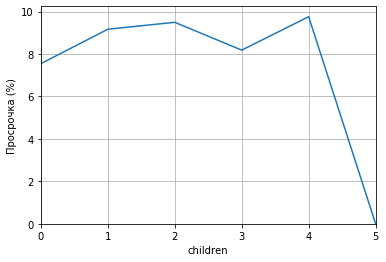

In [65]:
df_children_percent['debt_percent'].plot(ylim=0)
plt.ylabel("Просрочка (%)")
plt.xlabel("children")
plt.grid()

**Вывод**

Людей с 5 детьми всего 9 человек и  их лучше не расматривать. Тогда  люди которые без детей, имеют просрочку меньше, чем с детьми . И чем больше детей, тем больше просрочка.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Запишем необходимые данные family_status, family_status_id и debt  в отдельную таблицу для работы

In [66]:
df_family_status = df[['family_status','family_status_id','debt']]

In [67]:
df_family_status.head()

,family_status,family_status_id,debt
0,женат / замужем,0,0
1,женат / замужем,0,0
2,женат / замужем,0,0
3,женат / замужем,0,0
4,гражданский брак,1,0


Сгрупперуем данные по числу детей и посчитам их колличество(count) и сколько из них имели просрочку(sum)

In [68]:
df_family_status_percent = df_family_status.groupby('family_status_id')['debt'].agg(['count','sum']).reset_index()

Также вычеслим процент имевших просрочку

In [69]:
df_family_status_percent['debt_percent'] = df_family_status_percent['sum'] / df_family_status_percent['count']* 100

In [70]:
df_family_status_percent

,family_status_id,count,sum,debt_percent
0,0,12339,931,7.545182
1,1,4151,388,9.347145
2,2,959,63,6.569343
3,3,1195,85,7.112971
4,4,2810,274,9.750890


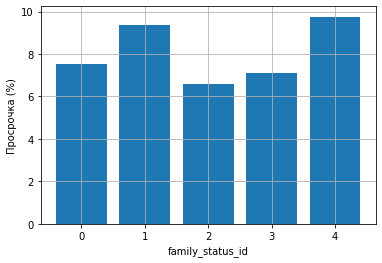

In [71]:
plt.bar(df_family_status_percent['family_status_id'],df_family_status_percent['debt_percent'])
plt.ylabel("Просрочка (%)")
plt.xlabel("family_status_id")
plt.grid()


Где:
* 0 - женат / замужем
*1 - гражданский брак
*2 - вдовец / вдова
*3 - в разводе
*4 - Не женат / не замужем

**Вывод**

Люди которые меньше всего с просрочкой по кредиту   со статусом вдовец / вдова. Далее идут  в разводе, женат / замужем. И больше всего не возращают со статусом гражданский брак и Не женат / не замужем.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Запишем необходимые данные total_income и debt в отдельную таблицу для работы

In [72]:
df_total_income = df[['debt','total_income']]

In [73]:
df_total_income

,debt,total_income
0,0,высокий
1,0,ниже_среднего
2,0,средний
3,0,высокий
4,0,средний
...,...,...
21449,0,высокий
21450,0,средний
21451,1,низкий
21452,1,высокий


Сгрупперуем данные по total_income и посчитам их колличество(count) и сколько из них имели просрочку(sum)

In [74]:
df_total_income_percent = df_total_income.groupby('total_income')['debt'].agg(['count','sum']).reset_index()

Также вычеслим процент имевших просрочку

In [75]:
df_total_income_percent['debt_percent'] = df_total_income_percent['sum'] / df_total_income_percent['count']* 100

Выведим таблицу и график.

In [76]:
df_total_income_percent

,total_income,count,sum,debt_percent
0,низкий,4291,344,8.016779
1,ниже_среднего,4291,361,8.412957
2,средний,4290,375,8.741259
3,выше_среднего,4291,361,8.412957
4,высокий,4291,300,6.991377


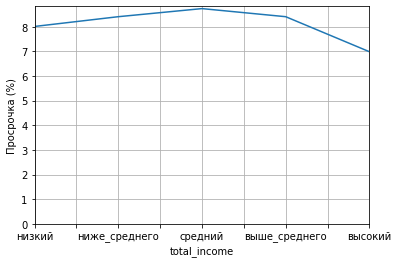

In [77]:
df_total_income_percent.groupby('total_income')['debt_percent'].mean().plot(ylim=0)
plt.ylabel("Просрочка (%)")
plt.grid()

**Вывод**

Максиальное число задолжностей у людей со средним доходом. С увеличением дохода от низкого до среднего значения задолженностей увеличивается. А после от средней зарплаты до высокой зарплатой задолженность уменьшается.

- Как разные цели кредита влияют на его возврат в срок?

Запишем необходимые данные purpose и debt в отдельную таблицу для работы

In [78]:
df_purpose = df[['purpose','debt']]

In [79]:
df_purpose

,purpose,debt
0,недвижимость,0
1,автомобиль,0
2,недвижимость,0
3,образование,0
4,свадьба,0
...,...,...
21449,недвижимость,0
21450,автомобиль,0
21451,недвижимость,1
21452,автомобиль,1


Сгрупперуем данные по purpose и посчитам их колличество(count) и сколько из них имели просрочку(sum)

In [80]:
df_purpose_percent = df_purpose.groupby('purpose')['debt'].agg(['count','sum']).reset_index()

Также вычеслим процент имевших просрочку

In [81]:
df_purpose_percent['debt_percent'] = df_purpose_percent['sum'] / df_purpose_percent['count']* 100

Выведим таблицу и график.

In [82]:
df_purpose_percent

,purpose,count,sum,debt_percent
0,автомобиль,4306,403,9.359034
1,недвижимость,8933,638,7.142058
2,образование,4013,370,9.220035
3,свадьба,2324,186,8.003442
4,строительство,1878,144,7.667732


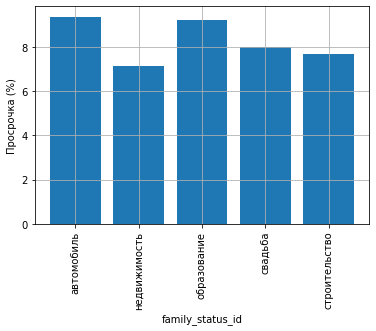

In [83]:
plt.bar(df_purpose_percent['purpose'],df_purpose_percent['debt_percent'])
plt.xlabel("family_status_id")
plt.ylabel("Просрочка (%)")
plt.xticks( rotation=90)
plt.grid()

In [84]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,выше_среднего,42,высшее,0,женат / замужем,0,F,сотрудник,0,высокий,недвижимость
1,1,выше_среднего,36,среднее,1,женат / замужем,0,F,сотрудник,0,ниже_среднего,автомобиль
2,0,выше_среднего,33,среднее,1,женат / замужем,0,M,сотрудник,0,средний,недвижимость
3,3,выше_среднего,32,среднее,1,женат / замужем,0,M,сотрудник,0,высокий,образование
4,0,много,53,среднее,1,гражданский брак,1,F,пенсионер,0,средний,свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,выше_среднего,43,среднее,1,гражданский брак,1,F,компаньон,0,высокий,недвижимость
21450,0,много,67,среднее,1,женат / замужем,0,F,пенсионер,0,средний,автомобиль
21451,1,средний,38,среднее,1,гражданский брак,1,M,сотрудник,1,низкий,недвижимость
21452,3,выше_среднего,38,среднее,1,женат / замужем,0,M,сотрудник,1,высокий,автомобиль


### Вывод

Людей которые меньше всего  имеют просрочку берут кредит для покупки недвижемости. Далее идут котрые берут для строительства и для свадьбы. И больше всего для образования и автомабиля

## Шаг 4. Общий вывод

Для исследования мы обработали данные а имнно:
* Исправление значений days_employed в них были как отрицательные так и нериально большие значения.
*Убрали пропуски. На каждый пропуск в total_income приходился пропуск в  days_employed.
*Привели данные к одинаковому виду и убрали дубликаты
*Сделали лемматизацию столбца purpose
*Сделали классификацию purpose, total_income и days_employed

В ходе иследования мы ответили на вопросы:
* Есть ли зависимость между наличием детей и возвратом кредита в срок?<br>

Люди без детей, имеют просрочку меньше, чем с детьми . Чем больше детей, тем больше процент просрочки.
* Есть ли зависимость между семейным положением и возвратом кредита в срок?

Люди которые меньше всего с просрочкой по кредиту  со статусом - вдовец / вдова. Далее идут - в разводе, женат / замужем. И больше всего имеют просрочку со статусом - гражданский брак, Не женат / не замужем.

* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Максиальное число задолжностей у людей со средним доходом. С увеличением дохода от низкого до среднего значения задолженностей увеличивается. А после от средней зарплаты до высокой зарплаты задолженность уменьшается.
* Как разные цели кредита влияют на его возврат в срок?

Людей которые меньше всего  имеют просрочку берут кредит для покупки недвижемости. Далее идут котрые берут для строительства и для свадьбы. И больше всего для образования и покупки автомабиля.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [ ]  файл изучен;
- [ ]  определены пропущенные значения;
- [ ]  заполнены пропущенные значения;
- [ ]  есть пояснение, какие пропущенные значения обнаружены;
- [ ]  описаны возможные причины появления пропусков в данных;
- [ ]  объяснено, по какому принципу заполнены пропуски;
- [ ]  заменен вещественный тип данных на целочисленный;
- [ ]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [ ]  удалены дубликаты;
- [ ]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [ ]  описаны возможные причины появления дубликатов в данных;
- [ ]  выделены леммы в значениях столбца с целями получения кредита;
- [ ]  описан процесс лемматизации;
- [ ]  данные категоризированы;
- [ ]  есть объяснение принципа категоризации данных;
- [ ]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [ ]  в каждом этапе есть выводы;
- [ ]  есть общий вывод.